In [ ]:
#OPENCV VERSION FOR USING SIFT
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0 MB 1.3 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 30.6 MB 28 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
#CBVR SAMPLE TEST BENCH FOR STPM_SIFT_HISTOGRAM_INTERSECTION / STPM_BEBLID_HISTOGRAM_INTERSECTION BASED COMPARISONS
#Accessing the feature database

#OPENCV VERSION FOR ORB AND BEBLID
#!pip install "opencv-contrib-python>=4.5.1"

import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing

#40800
def histogram_intersection(h1, h2, l):
    sm = 0

    for i in range(l):
        sm += min(h1[i], h2[i])
    return sm


# List to store result
feature_result = []

#CODE TO EXTRACT FEATURES FROM QUERY IMAGE


#QUERY VIDEO
import cv2
import numpy as np

import math

def extract_denseSIFT(img):
    DSIFT_STEP_SIZE = 2
    sift = cv2.xfeatures2d.SIFT_create()
    #sift = cv2.xfeatures2d.BEBLID_create(1)
    disft_step_size = DSIFT_STEP_SIZE
    keypoints = [cv2.KeyPoint(x, y, disft_step_size)
            for y in range(0, img.shape[0], disft_step_size)
                for x in range(0, img.shape[1], disft_step_size)]

    descriptors = sift.compute(img, keypoints)[1]
    
    #keypoints, descriptors = sift.detectAndCompute(gray, None)
    return descriptors

L = 1
#QUERY VIDEO
filepath = '/content/Biking5.mp4'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new = []
count_frame = 0
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  if(count_frame < (2**L + 1)):
  # Only care about gray scale.
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    W = frame.shape[1]
    H = frame.shape[0]   
    h = []
    for l in range(L+1):
        w_step = math.floor(W/(2**l))
        h_step = math.floor(H/(2**l))
        x, y = 0, 0
        for i in range(1,2**l + 1):
            x = 0
            for j in range(1, 2**l + 1):                
                desc = extract_denseSIFT(frame[y:y+h_step, x:x+w_step])                
                #print("type:",desc is None, "x:",x,"y:",y, "desc_size:",desc is None)
                kmeans = KMeans(n_clusters=60, init='k-means++', max_iter=300, n_init=10, random_state=0)
                predict = kmeans.fit_predict(desc)
                histo = np.bincount(predict, minlength=60).reshape(1,-1).ravel()
                weight = 2**(l-L)
                h.append(weight*histo)
                x = x + w_step
            y = y + h_step
            
    hist = np.array(h).ravel()
    # normalize hist
    dev = np.std(hist)
    hist -= np.mean(hist)
    hist /= dev

    features_current_file_new.append(hist)
    
    features_current_file = np.array(features_current_file_new)
# No of frames
print(len(features_current_file))  
            

            





# open a file, where you stored the pickled data
file = open('/content/PCA_Keyframe_SIFT_stpm_UCF50_10video_L1.p', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')


cnt = 0
for item in data:
    #print('The data ', cnt, ' is : ', item['path'])
    print('The data ', cnt, ' is : ', len(item['features']))

    
    point_a = np.array(item['features'])
    point_a = point_a.ravel()

    point_b = np.array(features_current_file)
    point_b = point_b.ravel()

    #distance = np.linalg.norm(point_a - point_b)
    distance = histogram_intersection(point_a, point_b, len(point_a))
    print(distance)
    
    feature_result.append({
                
                "path" : item['path'],
                "similarity" : distance,
                "category" : item['category'] 
            })

    cnt += 1

print(feature_result)
df = DataFrame (feature_result)
print (df)

#df1 = df.sort_values(by=['similarity'])
#df2 = df[df['similarity'] > 0].sort_values(by=['similarity'])
#print(df1)
df1 = df[df['similarity'] < 0].sort_values(by=['similarity'], ascending=False)
print(df1)


2
Showing the pickled data:
The data  0  is :  2
-222.98405213833288
The data  1  is :  2
-226.034937573552
The data  2  is :  2
-220.62673721576377
The data  3  is :  2
-217.96275021276512
The data  4  is :  2
-217.45907410400343
The data  5  is :  2
-216.84962187646673
The data  6  is :  2
-226.1805429804006
The data  7  is :  2
-223.01512474845174
The data  8  is :  2
7.34412530789541e-14
The data  9  is :  2
-211.5063872047073
The data  10  is :  2
-230.20017215882135
The data  11  is :  2
-211.39997436931398
The data  12  is :  2
-233.79926505585692
The data  13  is :  2
-232.86214710008005
The data  14  is :  2
-201.2680937247489
The data  15  is :  2
-219.20938522042806
The data  16  is :  2
-208.87573768321283
The data  17  is :  2
-217.84550972754516
The data  18  is :  2
-241.24373800736925
The data  19  is :  2
-203.11829799632687
The data  20  is :  2
-202.70340670713614
The data  21  is :  2
-237.57966624387782
The data  22  is :  2
-221.05626052269835
The data  23  is :  

In [ ]:
df2 = df[df['similarity'] > 0].sort_values(by=['similarity'])
#print(df2)
df1 = df[df['similarity'] < 0].sort_values(by=['similarity'], ascending=False)
#print(df1)
dff  = df2.append(df1, ignore_index=True)
print(dff)


                                                 path  ...     category
0         /content/UCF50/data/data/Biking/Biking5.mp4  ...       Biking
1   /content/UCF50/data/data/JumpingJack/JumpingJa...  ...  JumpingJack
2     /content/UCF50/data/data/Kayaking/Kayaking3.mp4  ...     Kayaking
3   /content/UCF50/data/data/JumpingJack/JumpingJa...  ...  JumpingJack
4         /content/UCF50/data/data/TaiChi/TaiChi3.mp4  ...       TaiChi
..                                                ...  ...          ...
65        /content/UCF50/data/data/Rowing/Rowing4.mp4  ...       Rowing
66        /content/UCF50/data/data/Skijet/Skijet9.mp4  ...       Skijet
67        /content/UCF50/data/data/Rowing/Rowing6.mp4  ...       Rowing
68        /content/UCF50/data/data/Rowing/Rowing8.mp4  ...       Rowing
69        /content/UCF50/data/data/Rowing/Rowing7.mp4  ...       Rowing

[70 rows x 3 columns]


In [ ]:
#MEAN AVERAGE PRECISION
import matplotlib.pyplot as plt

TP = 0
FP = 0

Total = len(dff) 
print(Total)
res = []
query = 'Biking'
#for i in range(0,Total):
for index, row in dff.iterrows():
  #print(row['category'])
  res.append(row['category'])
print(res)
print(len(res))

map = []
for i in range(0,len(res)):
  if(res[i] == query):
    map.append(1)
  else:
    map.append(0)

print(map)  

map_fet = []
mar_fet = []
mTP = 0

mTR = 0
for i in range(0,len(map)):
  if map[i] == 1:
    TP = TP + 1
    
  #true positive rate
    mTP = TP / (10)
  map_fet.append(mTP)  
  if map[i] == 0:
    FP = FP + 1
    #false positive rate
    mTR = FP / (70)
  mar_fet.append(mTR)
    
  
print(map_fet)
print(mar_fet)
np.savetxt('map_fet_fft.txt', map_fet)
np.savetxt('mar_fet_fft.txt', mar_fet)



70
['Biking', 'JumpingJack', 'Kayaking', 'JumpingJack', 'TaiChi', 'Kayaking', 'JumpingJack', 'Kayaking', 'Skijet', 'JumpingJack', 'Biking', 'Kayaking', 'PlayingGuitar', 'PlayingGuitar', 'Skijet', 'Biking', 'Rowing', 'Kayaking', 'Biking', 'TaiChi', 'JumpingJack', 'Biking', 'TaiChi', 'JumpingJack', 'TaiChi', 'PlayingGuitar', 'Biking', 'Kayaking', 'Biking', 'Biking', 'TaiChi', 'Kayaking', 'PlayingGuitar', 'Rowing', 'PlayingGuitar', 'Kayaking', 'PlayingGuitar', 'Biking', 'Biking', 'PlayingGuitar', 'TaiChi', 'Skijet', 'Skijet', 'Rowing', 'Skijet', 'PlayingGuitar', 'Kayaking', 'Rowing', 'JumpingJack', 'TaiChi', 'TaiChi', 'JumpingJack', 'PlayingGuitar', 'Skijet', 'JumpingJack', 'PlayingGuitar', 'Rowing', 'Skijet', 'TaiChi', 'TaiChi', 'Kayaking', 'Skijet', 'Rowing', 'JumpingJack', 'Skijet', 'Rowing', 'Skijet', 'Rowing', 'Rowing', 'Rowing']
70
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#MEAN AVERAGE PRECISION
import matplotlib.pyplot as plt

TP = 0

Total = len(dff) 
print(Total)
res = []
query = 'Biking'
#for i in range(0,Total):
for index, row in dff.iterrows():
  #print(row['category'])
  res.append(row['category'])
print(res)
print(len(res))

map = []
for i in range(0,len(res)):
  if(res[i] == query):
    map.append(1)
  else:
    map.append(0)

print(map)  

map_fet = []
mar_fet = []
mTP = 0

mTR = 0
for i in range(0,len(map)):
  TP = TP + map[i]
  mTP = TP / (i+1)
  mTR = TP / (10)
  map_fet.append(mTP)
  mar_fet.append(mTR)
  mTP = 0



print(map_fet)
print(mar_fet)



70
['Biking', 'TaiChi', 'PlayingGuitar', 'TaiChi', 'Rowing', 'Skijet', 'Rowing', 'JumpingJack', 'TaiChi', 'Biking', 'PlayingGuitar', 'Rowing', 'PlayingGuitar', 'PlayingGuitar', 'PlayingGuitar', 'Rowing', 'Kayaking', 'JumpingJack', 'JumpingJack', 'Skijet', 'Rowing', 'Rowing', 'Rowing', 'Biking', 'Kayaking', 'Rowing', 'PlayingGuitar', 'JumpingJack', 'Kayaking', 'Skijet', 'Skijet', 'Rowing', 'PlayingGuitar', 'PlayingGuitar', 'JumpingJack', 'TaiChi', 'Skijet', 'Skijet', 'Skijet', 'PlayingGuitar', 'Biking', 'JumpingJack', 'PlayingGuitar', 'TaiChi', 'TaiChi', 'JumpingJack', 'JumpingJack', 'JumpingJack', 'TaiChi', 'Kayaking', 'Biking', 'Biking', 'TaiChi', 'Kayaking', 'Kayaking', 'Biking', 'Biking', 'Biking', 'Skijet', 'Skijet', 'Skijet', 'TaiChi', 'Kayaking', 'Biking', 'Kayaking', 'Kayaking', 'TaiChi', 'Kayaking', 'JumpingJack', 'Rowing']
70
[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

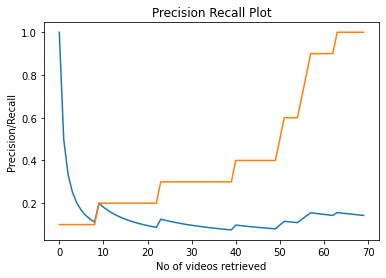

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
x = np.arange(0, len(res), 1)
y1 = map_fet
y2 = mar_fet
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel("No of videos retrieved")
plt.ylabel("Precision/Recall")
plt.title('Precision Recall Plot')
plt.show()

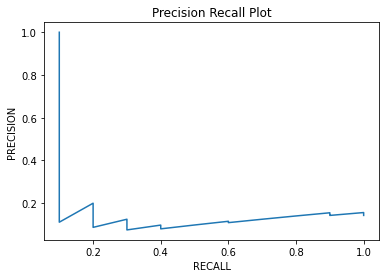

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
x = np.arange(0, len(res), 1)
y1 = map_fet
y2 = mar_fet
#plt.plot(x,y1)
plt.plot(y2,y1)
plt.xlabel("RECALL")
plt.ylabel("PRECISION")
plt.title('Precision Recall Plot')
plt.show()

In [ ]:
import csv
import numpy as np
a1 = []
with open ('/content/map_fet_fft.txt', 'r') as f:
    first_column = [row[0] for row in csv.reader(f,delimiter='\t')]
    for i in range(len(first_column)):
      a1.append(np.float(first_column[i]))
b1 = []
with open ('/content/mar_fet_fft.txt', 'r') as f:
    first_column = [row[0] for row in csv.reader(f,delimiter='\t')]
    for i in range(len(first_column)):
      b1.append(np.float(first_column[i]))


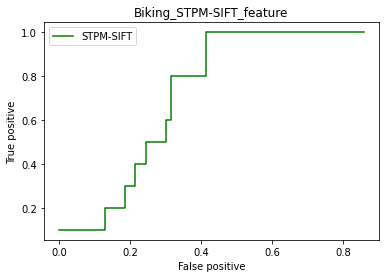

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
#x = np.arange(0, len(res), 1)
#y1 = a #map_fet
#y2 = b #mar_fet
y3 = a1 #map_fet_fft
y4 = b1 #mar_fet_fft
#plt.plot(y2,y1, "-b", label="STPM-SIFT_OPTFLOW")
plt.plot(y4,y3, "-g", label = "STPM-SIFT")
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title('Biking_STPM-SIFT_feature')
plt.legend()
plt.show()

In [ ]:
#CBVR SAMPLE TEST BENCH FOR STPM_SIFT_HISTOGRAM_INTERSECTION + STPM_OPTFLOW_HISTOGRAM_HISTOGRAM BASED COMPARISONS
#Accessing the feature database
import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing

#OPENCV VERSION FOR USING SIFT
#!pip install opencv-python==3.4.2.17
#!pip install opencv-contrib-python==3.4.2.17
#40800
def histogram_intersection(h1, h2, l):
    sm = 0

    for i in range(l):
        sm += min(h1[i], h2[i])
    return sm

L = 2
farneback_params = dict(winsize = 20, iterations=1,
        flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN, levels=1,
        pyr_scale=0.5, poly_n=5, poly_sigma=1.1, flow=None)
L = 2
#QUERY VIDEO
filepath = '/content/Biking5.mp4'
vid = cv2.VideoCapture(filepath)

# List to store result
feature_result = []
feature_result1 = []

#CODE TO EXTRACT OPTICALFLOW FEATURES FROM QUERY IMAGE

features_current_file_new = []
count_frame = 0
prev_frame = None
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  # Only care about gray scale.
  if(count_frame < 2**L + 1):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #print(frame)
    if(prev_frame is not None):

      W = frame.shape[1]
      H = frame.shape[0]   
      h = []
      for l in range(L+1):
          w_step = math.floor(W/(2**l))
          h_step = math.floor(H/(2**l))
          x, y = 0, 0
          for i in range(1,2**l + 1):
              x = 0
              for j in range(1, 2**l + 1): 
                #desc = extract_denseSIFT(img[y:y+h_step, x:x+w_step])               
                flows = cv2.calcOpticalFlowFarneback(prev_frame[y:y+h_step, x:x+w_step], frame[y:y+h_step, x:x+w_step],**farneback_params)
                feature = []
                #for r in range(w_step):
                  #if r % 10 != 0:
                    #continue
                  #for c in range(h_step):
                    #if c % 10 != 0:
                      #continue
                    #feature.append(flows[r,c,0])
                    #feature.append(flows[r,c,1])
                feature.append(flows)
                feature = np.array(feature)
                feature = feature.reshape(-1, 1)

                kmeans = KMeans(n_clusters=60, init='k-means++', max_iter=300, n_init=10, random_state=0)
                predict = kmeans.fit_predict(feature)

                histo = np.bincount(predict, minlength=60).reshape(1,-1).ravel()
                weight = 2**(l-L)
                h.append(weight*histo)
                x = x + w_step
              y = y + h_step
            
      hist = np.array(h).ravel()
    # normalize hist
      dev = np.std(hist)
      hist -= np.mean(hist)
      hist /= dev
      features_current_file_new.append(hist)
    #print(flows)
      
      #features_current_file_new.append(feature)
    prev_frame = frame
features_current_file_new = np.array(features_current_file_new)



#QUERY VIDEO STPM BEBLID FEATURE
import cv2
import numpy as np

import math

def extract_denseSIFT(img):
    DSIFT_STEP_SIZE = 2
    sift = cv2.xfeatures2d.SIFT_create()
    #sift = cv2.xfeatures2d.BEBLID_create(1)
    disft_step_size = DSIFT_STEP_SIZE
    keypoints = [cv2.KeyPoint(x, y, disft_step_size)
            for y in range(0, img.shape[0], disft_step_size)
                for x in range(0, img.shape[1], disft_step_size)]

    descriptors = sift.compute(img, keypoints)[1]
    
    #keypoints, descriptors = sift.detectAndCompute(gray, None)
    return descriptors

L = 1
#QUERY VIDEO
filepath = '/content/Biking5.mp4'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new1 = []
count_frame = 0
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  if(count_frame < (2**L + 1)):
  # Only care about gray scale.
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    W = frame.shape[1]
    H = frame.shape[0]   
    h = []
    for l in range(L+1):
        w_step = math.floor(W/(2**l))
        h_step = math.floor(H/(2**l))
        x, y = 0, 0
        for i in range(1,2**l + 1):
            x = 0
            for j in range(1, 2**l + 1):                
                desc = extract_denseSIFT(frame[y:y+h_step, x:x+w_step])                
                #print("type:",desc is None, "x:",x,"y:",y, "desc_size:",desc is None)
                kmeans = KMeans(n_clusters=60, init='k-means++', max_iter=300, n_init=10, random_state=0)
                predict = kmeans.fit_predict(desc)
                histo = np.bincount(predict, minlength=60).reshape(1,-1).ravel()
                weight = 2**(l-L)
                h.append(weight*histo)
                x = x + w_step
            y = y + h_step
            
    hist = np.array(h).ravel()
    # normalize hist
    dev = np.std(hist)
    hist -= np.mean(hist)
    hist /= dev

    features_current_file_new1.append(hist)
    
features_current_file = np.array(features_current_file_new1)
# No of frames
print(len(features_current_file))  
            

            





# open a file, where you stored the pickled data
file = open('/content/PCA_KEY_SIFT_OPTFLOW_STPM_UCF50.p', 'rb')


# dump information to that file
data = pickle.load(file)


# close the file
file.close()



print('Showing the pickled data:')


cnt = 0
for item in data:
    #print('The data ', cnt, ' is : ', item['path'])
    #print('The data ', cnt, ' is : ', len(item['features']))

    
    point_a = np.array(item['feature1'])
    point_a = point_a.ravel()

    point_b = np.array(features_current_file)
    point_b = point_b.ravel()

    #distance = np.linalg.norm(point_a - point_b)
    distance = histogram_intersection(point_a, point_b, len(point_a))

    point_c = np.array(item['feature2'])
    point_c = point_c.ravel()

    point_d = np.array(features_current_file_new)
    point_d = point_d.ravel()

    #distance1 = np.linalg.norm(point_c - point_d)
    distance1 = histogram_intersection(point_c, point_d, len(point_c))
    print(distance1)

    alpha = 0.2

    distance_final = (alpha * distance) + ((1-alpha)* distance1)
    
    feature_result.append({
                
                "path" : item['path'],
                "similarity" : distance_final,
                "category" : item['category'] 
            })

    cnt += 1



print(feature_result)
df = DataFrame (feature_result)
print (df)





df1 = df[df['similarity'] < 0].sort_values(by=['similarity'], ascending=False)
#df1 = df.sort_values(by=['similarity'])
print(df1)


2
Showing the pickled data:
-1471.7307844396703
-1473.7495591664606
-1367.037672617606
-1466.9518215773273
-1259.5978719260377
-1431.6067889949707
-1280.0944959204699
-1438.6314037805937
5.392353230604385e-13
-1510.8961777662262
-1267.4737298484606
-1329.3226881826686
-1267.2155112997834
-1247.1459055227383
-1402.2555206978225
-1373.5267339983022
-1402.9205271595972
-1534.826194920147
-1285.479882173241
-1396.1618832928098
-1533.7789032972598
-1278.743553544553
-1506.6762248554962
-1515.6518029576946
-1455.624550453057
-1268.8038024582056
-1425.0466148101532
-1456.5039750445349
-1521.0835877920683
-1292.072271181564
-1303.0141787071168
-1379.3440131861419
-1261.7517669853125
-1289.045207571566
-1258.6116164840184
-1259.8131983262206
-1347.5654979949893
-1226.8573628986346
-1262.370396479291
-1316.8729950822794
-1269.7442836123903
-1283.2010183952023
-1570.9513464430436
-1277.2636169978146
-1242.4587902193434
-1272.9594391214055
-1255.36541550149
-1258.118047350341
-1237.2167613272252
-

In [ ]:
df2 = df[df['similarity'] > 0].sort_values(by=['similarity'])
#print(df2)
df1 = df[df['similarity'] < 0].sort_values(by=['similarity'], ascending=False)
#print(df1)
dff  = df2.append(df1, ignore_index=True)
print(dff)


                                                 path  ...       category
0         /content/UCF50/data/data/Biking/Biking5.mp4  ...         Biking
1         /content/UCF50/data/data/TaiChi/TaiChi8.mp4  ...         TaiChi
2   /content/UCF50/data/data/PlayingGuitar/Playing...  ...  PlayingGuitar
3         /content/UCF50/data/data/TaiChi/TaiChi6.mp4  ...         TaiChi
4         /content/UCF50/data/data/Rowing/Rowing3.mp4  ...         Rowing
..                                                ...  ...            ...
65    /content/UCF50/data/data/Kayaking/Kayaking7.mp4  ...       Kayaking
66        /content/UCF50/data/data/TaiChi/TaiChi3.mp4  ...         TaiChi
67    /content/UCF50/data/data/Kayaking/Kayaking3.mp4  ...       Kayaking
68  /content/UCF50/data/data/JumpingJack/JumpingJa...  ...    JumpingJack
69        /content/UCF50/data/data/Rowing/Rowing5.mp4  ...         Rowing

[70 rows x 3 columns]


In [ ]:
#MEAN AVERAGE PRECISION
import matplotlib.pyplot as plt

TP = 0
FP = 0

Total = len(dff) 
print(Total)
res = []
query = 'Biking'
#for i in range(0,Total):
for index, row in dff.iterrows():
  #print(row['category'])
  res.append(row['category'])
print(res)
print(len(res))

map = []
for i in range(0,len(res)):
  if(res[i] == query):
    map.append(1)
  else:
    map.append(0)

print(map)  

map_fet = []
mar_fet = []
mTP = 0

mTR = 0
for i in range(0,len(map)):
  if map[i] == 1:
    TP = TP + 1
    
  #true positive rate
    mTP = TP / (10)
  map_fet.append(mTP)  
  if map[i] == 0:
    FP = FP + 1
    #false positive rate
    mTR = FP / (70)
  mar_fet.append(mTR)
    
  
print(map_fet)
print(mar_fet)
np.savetxt('map_fet.txt', map_fet)
np.savetxt('mar_fet.txt', mar_fet)



70
['Biking', 'TaiChi', 'PlayingGuitar', 'TaiChi', 'Rowing', 'Skijet', 'Rowing', 'JumpingJack', 'TaiChi', 'Biking', 'PlayingGuitar', 'Rowing', 'PlayingGuitar', 'PlayingGuitar', 'PlayingGuitar', 'Rowing', 'Kayaking', 'JumpingJack', 'JumpingJack', 'Skijet', 'Rowing', 'Rowing', 'Rowing', 'Biking', 'Kayaking', 'Rowing', 'PlayingGuitar', 'JumpingJack', 'Kayaking', 'Skijet', 'Skijet', 'Rowing', 'PlayingGuitar', 'PlayingGuitar', 'JumpingJack', 'TaiChi', 'Skijet', 'Skijet', 'Skijet', 'PlayingGuitar', 'Biking', 'JumpingJack', 'PlayingGuitar', 'TaiChi', 'TaiChi', 'JumpingJack', 'JumpingJack', 'JumpingJack', 'TaiChi', 'Kayaking', 'Biking', 'Biking', 'TaiChi', 'Kayaking', 'Kayaking', 'Biking', 'Biking', 'Biking', 'Skijet', 'Skijet', 'Skijet', 'TaiChi', 'Kayaking', 'Biking', 'Kayaking', 'Kayaking', 'TaiChi', 'Kayaking', 'JumpingJack', 'Rowing']
70
[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
import csv
import numpy as np
a = []
with open ('/content/map_fet.txt', 'r') as f:
    first_column = [row[0] for row in csv.reader(f,delimiter='\t')]
    for i in range(len(first_column)):
      a.append(np.float(first_column[i]))
b = []
with open ('/content/mar_fet.txt', 'r') as f:
    first_column = [row[0] for row in csv.reader(f,delimiter='\t')]
    for i in range(len(first_column)):
      b.append(np.float(first_column[i]))


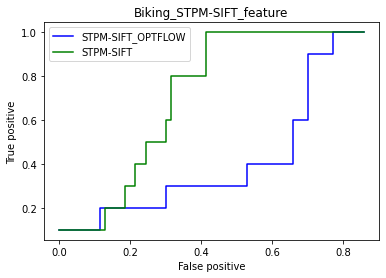

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
#x = np.arange(0, len(res), 1)
y1 = a #map_fet
y2 = b #mar_fet
y3 = a1 #map_fet_fft
y4 = b1 #mar_fet_fft
plt.plot(y2,y1, "-b", label="STPM-SIFT_OPTFLOW")
plt.plot(y4,y3, "-g", label = "STPM-SIFT")
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title('Biking_STPM-SIFT_feature')
plt.legend()
plt.show()

In [ ]:
#MEAN AVERAGE PRECISION
import matplotlib.pyplot as plt

TP = 0

Total = len(dff) 
print(Total)
res = []
query = 'Biking'
#for i in range(0,Total):
for index, row in dff.iterrows():
  #print(row['category'])
  res.append(row['category'])
print(res)
print(len(res))

map = []
for i in range(0,len(res)):
  if(res[i] == query):
    map.append(1)
  else:
    map.append(0)

print(map)  

map_fet1 = []
mar_fet1 = []
mTP = 0

mTR = 0
for i in range(0,len(map)):
  TP = TP + map[i]
  mTP = TP / (i+1)
  mTR = TP / (10)
  map_fet1.append(mTP)
  mar_fet1.append(mTR)
  mTP = 0



print(map_fet1)
print(mar_fet1)



70
['Biking', 'TaiChi', 'PlayingGuitar', 'TaiChi', 'Rowing', 'Skijet', 'Rowing', 'JumpingJack', 'TaiChi', 'Biking', 'PlayingGuitar', 'Rowing', 'PlayingGuitar', 'PlayingGuitar', 'PlayingGuitar', 'Rowing', 'Kayaking', 'JumpingJack', 'JumpingJack', 'Skijet', 'Rowing', 'Rowing', 'Rowing', 'Biking', 'Kayaking', 'Rowing', 'PlayingGuitar', 'JumpingJack', 'Kayaking', 'Skijet', 'Skijet', 'Rowing', 'PlayingGuitar', 'PlayingGuitar', 'JumpingJack', 'TaiChi', 'Skijet', 'Skijet', 'Skijet', 'PlayingGuitar', 'Biking', 'JumpingJack', 'PlayingGuitar', 'TaiChi', 'TaiChi', 'JumpingJack', 'JumpingJack', 'JumpingJack', 'TaiChi', 'Kayaking', 'Biking', 'Biking', 'TaiChi', 'Kayaking', 'Kayaking', 'Biking', 'Biking', 'Biking', 'Skijet', 'Skijet', 'Skijet', 'TaiChi', 'Kayaking', 'Biking', 'Kayaking', 'Kayaking', 'TaiChi', 'Kayaking', 'JumpingJack', 'Rowing']
70
[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

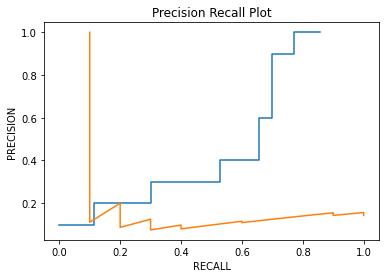

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
x = np.arange(0, len(res), 1)
y1 = map_fet
y2 = mar_fet
y3 = map_fet1
y4 = mar_fet1
#plt.plot(x,y1)
plt.plot(y2,y1)
plt.plot(y4,y3)
plt.xlabel("RECALL")
plt.ylabel("PRECISION")
plt.title('Precision Recall Plot')
plt.show()

In [ ]:
#OPENCV VERSION FOR ORB AND BEBLID
!pip install "opencv-contrib-python>=4.5.1"


     |████████████████████████████████| 56.1 MB 31 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 3.4.2.17
    Uninstalling opencv-contrib-python-3.4.2.17:
      Successfully uninstalled opencv-contrib-python-3.4.2.17


In [ ]:
#CBVR SAMPLE TEST BENCH FOR STPM_SIFT_HISTOGRAM_INTERSECTION / STPM_BEBLID_HISTOGRAM_INTERSECTION BASED COMPARISONS
#Accessing the feature database

#OPENCV VERSION FOR ORB AND BEBLID
#!pip install "opencv-contrib-python>=4.5.1"

import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing

#40800
def histogram_intersection(h1, h2, l):
    sm = 0

    for i in range(l):
        sm += min(h1[i], h2[i])
    return sm


# List to store result
feature_result = []

#CODE TO EXTRACT FEATURES FROM QUERY IMAGE


#QUERY VIDEO
import cv2
import numpy as np

import math

def extract_denseSIFT(img):
    DSIFT_STEP_SIZE = 2
    #sift = cv2.xfeatures2d.SIFT_create()
    sift = cv2.xfeatures2d.BEBLID_create(1)
    disft_step_size = DSIFT_STEP_SIZE
    keypoints = [cv2.KeyPoint(x, y, disft_step_size)
            for y in range(0, img.shape[0], disft_step_size)
                for x in range(0, img.shape[1], disft_step_size)]

    descriptors = sift.compute(img, keypoints)[1]
    
    #keypoints, descriptors = sift.detectAndCompute(gray, None)
    return descriptors

L = 1
#QUERY VIDEO
filepath = '/content/UCF50/data/Biking/Biking5.mp4'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new = []
count_frame = 0
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  if(count_frame < (2**L + 1)):
  # Only care about gray scale.
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    W = frame.shape[1]
    H = frame.shape[0]   
    h = []
    for l in range(L+1):
        w_step = math.floor(W/(2**l))
        h_step = math.floor(H/(2**l))
        x, y = 0, 0
        for i in range(1,2**l + 1):
            x = 0
            for j in range(1, 2**l + 1):                
                desc = extract_denseSIFT(frame[y:y+h_step, x:x+w_step])                
                #print("type:",desc is None, "x:",x,"y:",y, "desc_size:",desc is None)
                kmeans = KMeans(n_clusters=60, init='k-means++', max_iter=300, n_init=10, random_state=0)
                predict = kmeans.fit_predict(desc)
                histo = np.bincount(predict, minlength=60).reshape(1,-1).ravel()
                weight = 2**(l-L)
                h.append(weight*histo)
                x = x + w_step
            y = y + h_step
            
    hist = np.array(h).ravel()
    # normalize hist
    dev = np.std(hist)
    hist -= np.mean(hist)
    hist /= dev

    features_current_file_new.append(hist)
    
    features_current_file = np.array(features_current_file_new)
# No of frames
print(len(features_current_file))  
            

            





# open a file, where you stored the pickled data
file = open('/content/UCF50/data/data/PCA_Keyframe_BEBLID_stpm_UCF50_10video_L1.p', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')


cnt = 0
for item in data:
    #print('The data ', cnt, ' is : ', item['path'])
    print('The data ', cnt, ' is : ', len(item['features']))

    
    point_a = np.array(item['features'])
    point_a = point_a.ravel()

    point_b = np.array(features_current_file)
    point_b = point_b.ravel()

    #distance = np.linalg.norm(point_a - point_b)
    distance = histogram_intersection(point_a, point_b, len(point_a))
    print(distance)
    
    feature_result.append({
                
                "path" : item['path'],
                "similarity" : distance,
                "category" : item['category'] 
            })

    cnt += 1

print(feature_result)
df = DataFrame (feature_result)
print (df)

df2 = df[df['similarity'] > 0].sort_values(by=['similarity'])
#print(df2)
df1 = df[df['similarity'] < 0].sort_values(by=['similarity'], ascending=False)
#print(df1)
dff  = df2.append(df1, ignore_index=True)
print(dff)


2
Showing the pickled data:
The data  0  is :  2
-100.8681055741638
The data  1  is :  2
-116.54097407543081
The data  2  is :  2
-160.25439777554263
The data  3  is :  2
-130.66079603874172
The data  4  is :  2
-116.82733951649402
The data  5  is :  2
-157.15027445303477
The data  6  is :  2
-103.54226286625354
The data  7  is :  2
-138.07735484430285
The data  8  is :  2
-2.3869795029440866e-15
The data  9  is :  2
-146.3567095899409
The data  10  is :  2
-142.30938587295384
The data  11  is :  2
-111.30490010733048
The data  12  is :  2
-220.83687819009833
The data  13  is :  2
-211.14347236649655
The data  14  is :  2
-206.423385488574
The data  15  is :  2
-152.20324764998637
The data  16  is :  2
-96.72447375882186
The data  17  is :  2
-184.79891943034025
The data  18  is :  2
-220.49788049983792
The data  19  is :  2
-136.93644217033514
The data  20  is :  2
-125.24822456106457
The data  21  is :  2
-142.70261295493322
The data  22  is :  2
-169.34371975345127
The data  23  is 

In [ ]:
#MEAN AVERAGE PRECISION
import matplotlib.pyplot as plt

TP = 0
FP = 0

Total = len(dff) 
print(Total)
res = []
query = 'Biking'
#for i in range(0,Total):
for index, row in dff.iterrows():
  #print(row['category'])
  res.append(row['category'])
print(res)
print(len(res))

map = []
for i in range(0,len(res)):
  if(res[i] == query):
    map.append(1)
  else:
    map.append(0)

print(map)  

map_fet = []
mar_fet = []
mTP = 0

mTR = 0
for i in range(0,len(map)):
  if map[i] == 1:
    TP = TP + 1
    
  #true positive rate
    mTP = TP / (10)
  map_fet.append(mTP)  
  if map[i] == 0:
    FP = FP + 1
    #false positive rate
    mTR = FP / (70)
  mar_fet.append(mTR)
    
  
print(map_fet)
print(mar_fet)
#np.savetxt('map_fet.txt', map_fet)
#np.savetxt('mar_fet.txt', mar_fet)



70
['Biking', 'Rowing', 'TaiChi', 'Rowing', 'Rowing', 'JumpingJack', 'Kayaking', 'PlayingGuitar', 'Biking', 'PlayingGuitar', 'Biking', 'Rowing', 'Skijet', 'TaiChi', 'PlayingGuitar', 'TaiChi', 'Rowing', 'PlayingGuitar', 'JumpingJack', 'PlayingGuitar', 'Skijet', 'PlayingGuitar', 'Rowing', 'PlayingGuitar', 'Biking', 'Biking', 'Kayaking', 'Rowing', 'Rowing', 'Kayaking', 'Skijet', 'Skijet', 'TaiChi', 'Biking', 'PlayingGuitar', 'Skijet', 'Kayaking', 'PlayingGuitar', 'JumpingJack', 'Biking', 'JumpingJack', 'Skijet', 'Kayaking', 'Biking', 'Rowing', 'JumpingJack', 'PlayingGuitar', 'Kayaking', 'Biking', 'Kayaking', 'Skijet', 'Biking', 'Skijet', 'Rowing', 'Kayaking', 'TaiChi', 'Kayaking', 'TaiChi', 'JumpingJack', 'TaiChi', 'Skijet', 'Skijet', 'TaiChi', 'TaiChi', 'JumpingJack', 'Kayaking', 'JumpingJack', 'TaiChi', 'JumpingJack', 'JumpingJack']
70
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

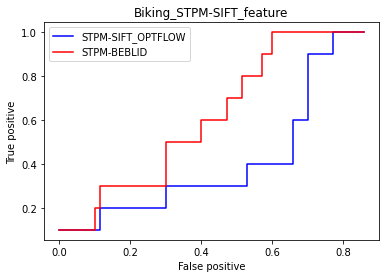

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
#x = np.arange(0, len(res), 1)
y1 = a #map_fet
y2 = b #mar_fet
y3 = a1 #map_fet_fft
y4 = b1 #mar_fet_fft
y5 = map_fet
y6 = mar_fet
plt.plot(y2,y1, "-b", label="STPM-SIFT_OPTFLOW")
#plt.plot(y4,y3, "-g", label = "STPM-SIFT")
plt.plot(y6,y5, "-r", label = "STPM-BEBLID")
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title('Biking_STPM-SIFT_feature')
plt.legend()
plt.show()

In [ ]:
#CBVR SAMPLE TEST BENCH FOR STPM_BEBLID_HISTOGRAM_INTERSECTION + STPM_OPTFLOW_HISTOGRAM_HISTOGRAM BASED COMPARISONS
#Accessing the feature database
import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing

#!pip install "opencv-contrib-python>=4.5.1"

#40800
def histogram_intersection(h1, h2, l):
    sm = 0

    for i in range(l):
        sm += min(h1[i], h2[i])
    return sm

L = 2
farneback_params = dict(winsize = 20, iterations=1,
        flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN, levels=1,
        pyr_scale=0.5, poly_n=5, poly_sigma=1.1, flow=None)
L = 2
#QUERY VIDEO
filepath = '/content/UCF50/data/Biking/Biking5.mp4'
vid = cv2.VideoCapture(filepath)

# List to store result
feature_result = []
feature_result1 = []

#CODE TO EXTRACT OPTICALFLOW FEATURES FROM QUERY IMAGE

features_current_file_new = []
count_frame = 0
prev_frame = None
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  # Only care about gray scale.
  if(count_frame < 2**L + 1):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #print(frame)
    if(prev_frame is not None):

      W = frame.shape[1]
      H = frame.shape[0]   
      h = []
      for l in range(L+1):
          w_step = math.floor(W/(2**l))
          h_step = math.floor(H/(2**l))
          x, y = 0, 0
          for i in range(1,2**l + 1):
              x = 0
              for j in range(1, 2**l + 1): 
                #desc = extract_denseSIFT(img[y:y+h_step, x:x+w_step])               
                flows = cv2.calcOpticalFlowFarneback(prev_frame[y:y+h_step, x:x+w_step], frame[y:y+h_step, x:x+w_step],**farneback_params)
                feature = []
                #for r in range(w_step):
                  #if r % 10 != 0:
                    #continue
                  #for c in range(h_step):
                    #if c % 10 != 0:
                      #continue
                    #feature.append(flows[r,c,0])
                    #feature.append(flows[r,c,1])
                feature.append(flows)
                feature = np.array(feature)
                feature = feature.reshape(-1, 1)

                kmeans = KMeans(n_clusters=60, init='k-means++', max_iter=300, n_init=10, random_state=0)
                predict = kmeans.fit_predict(feature)

                histo = np.bincount(predict, minlength=60).reshape(1,-1).ravel()
                weight = 2**(l-L)
                h.append(weight*histo)
                x = x + w_step
              y = y + h_step
            
      hist = np.array(h).ravel()
    # normalize hist
      dev = np.std(hist)
      hist -= np.mean(hist)
      hist /= dev
      features_current_file_new.append(hist)
    #print(flows)
      
      #features_current_file_new.append(feature)
    prev_frame = frame
features_current_file_new = np.array(features_current_file_new)



#QUERY VIDEO STPM BEBLID FEATURE
import cv2
import numpy as np

import math

def extract_denseSIFT(img):
    DSIFT_STEP_SIZE = 2
    #sift = cv2.xfeatures2d.SIFT_create()
    sift = cv2.xfeatures2d.BEBLID_create(1)
    disft_step_size = DSIFT_STEP_SIZE
    keypoints = [cv2.KeyPoint(x, y, disft_step_size)
            for y in range(0, img.shape[0], disft_step_size)
                for x in range(0, img.shape[1], disft_step_size)]

    descriptors = sift.compute(img, keypoints)[1]
    
    #keypoints, descriptors = sift.detectAndCompute(gray, None)
    return descriptors

L = 1
#QUERY VIDEO
filepath = '/content/UCF50/data/Biking/Biking5.mp4'
vid = cv2.VideoCapture(filepath)

            # Store features in current file.
features_current_file_new1 = []
count_frame = 0
while vid.isOpened():
  ret, frame = vid.read()
  count_frame = count_frame + 1
  if not ret:
    break
  if(count_frame < (2**L + 1)):
  # Only care about gray scale.
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    W = frame.shape[1]
    H = frame.shape[0]   
    h = []
    for l in range(L+1):
        w_step = math.floor(W/(2**l))
        h_step = math.floor(H/(2**l))
        x, y = 0, 0
        for i in range(1,2**l + 1):
            x = 0
            for j in range(1, 2**l + 1):                
                desc = extract_denseSIFT(frame[y:y+h_step, x:x+w_step])                
                #print("type:",desc is None, "x:",x,"y:",y, "desc_size:",desc is None)
                kmeans = KMeans(n_clusters=60, init='k-means++', max_iter=300, n_init=10, random_state=0)
                predict = kmeans.fit_predict(desc)
                histo = np.bincount(predict, minlength=60).reshape(1,-1).ravel()
                weight = 2**(l-L)
                h.append(weight*histo)
                x = x + w_step
            y = y + h_step
            
    hist = np.array(h).ravel()
    # normalize hist
    dev = np.std(hist)
    hist -= np.mean(hist)
    hist /= dev

    features_current_file_new1.append(hist)
    
features_current_file = np.array(features_current_file_new1)
# No of frames
print(len(features_current_file))  
            

            





# open a file, where you stored the pickled data
file = open('/content/UCF50/data/data/PCA_KEY_BEBLID_OPTFLOW_STPM_UCF50.p', 'rb')


# dump information to that file
data = pickle.load(file)


# close the file
file.close()



print('Showing the pickled data:')


cnt = 0
for item in data:
    #print('The data ', cnt, ' is : ', item['path'])
    #print('The data ', cnt, ' is : ', len(item['features']))

    
    point_a = np.array(item['feature1'])
    point_a = point_a.ravel()

    point_b = np.array(features_current_file)
    point_b = point_b.ravel()

    #distance = np.linalg.norm(point_a - point_b)
    distance = histogram_intersection(point_a, point_b, len(point_a))

    point_c = np.array(item['feature2'])
    point_c = point_c.ravel()

    point_d = np.array(features_current_file_new)
    point_d = point_d.ravel()

    #distance1 = np.linalg.norm(point_c - point_d)
    distance1 = histogram_intersection(point_c, point_d, len(point_c))
    print(distance1)

    alpha = 0.2

    distance_final = (alpha * distance) + ((1-alpha)* distance1)
    
    feature_result.append({
                
                "path" : item['path'],
                "similarity" : distance_final,
                "category" : item['category'] 
            })

    cnt += 1



print(feature_result)
df = DataFrame (feature_result)
print (df)





df2 = df[df['similarity'] > 0].sort_values(by=['similarity'])
#print(df2)
df1 = df[df['similarity'] < 0].sort_values(by=['similarity'], ascending=False)
#print(df1)
dff  = df2.append(df1, ignore_index=True)
print(dff)


2
Showing the pickled data:
-1294.634212765516
-1443.423574457597
-1528.2245089441672
-1479.5136926758603
-1442.3245606146552
-1474.117063143006
-1364.0694745374774
-1260.523613012573
-200.20050975372658
-1449.775455660313
-1313.159802140764
-1278.8656711787157
-1396.4651869209924
-1351.1185175419573
-1381.6805615151154
-1263.8046728972731
-1235.8721295006983
-1536.059138495967
-1378.530812357611
-1256.1552240156147
-1450.7114814651236
-1446.6593389449051
-1501.2435659104467
-1265.681353769838
-1525.028111263711
-1277.1001902936684
-1519.2644101745032
-1544.0928823752577
-1274.396013008181
-1431.5279655481054
-1316.0494640842028
-1249.4445280178884
-1338.071728392207
-1221.7761613749235
-1267.7160684928754
-1248.6598261441893
-1286.6596099935152
-1267.6454552455612
-1376.9686843635786
-1304.7996894601476
-1268.3447584207083
-1256.9076917213076
-1557.1070419739247
-1245.907271199346
-1238.4105040666109
-1227.640262573686
-1280.0621556770795
-1229.9990899926488
-1300.1420359781637
-1278.

In [ ]:
#MEAN AVERAGE PRECISION
import matplotlib.pyplot as plt

TP = 0
FP = 0

Total = len(dff) 
print(Total)
res = []
query = 'Biking'
#for i in range(0,Total):
for index, row in dff.iterrows():
  #print(row['category'])
  res.append(row['category'])
print(res)
print(len(res))

map = []
for i in range(0,len(res)):
  if(res[i] == query):
    map.append(1)
  else:
    map.append(0)

print(map)  

map_fet1 = []
mar_fet1 = []
mTP = 0

mTR = 0
for i in range(0,len(map)):
  if map[i] == 1:
    TP = TP + 1
    
  #true positive rate
    mTP = TP / (10)
  map_fet1.append(mTP)  
  if map[i] == 0:
    FP = FP + 1
    #false positive rate
    mTR = FP / (70)
  mar_fet1.append(mTR)
    
  
print(map_fet1)
print(mar_fet1)
#np.savetxt('map_fet.txt', map_fet)
#np.savetxt('mar_fet.txt', mar_fet)



70
['Biking', 'PlayingGuitar', 'TaiChi', 'TaiChi', 'Rowing', 'Skijet', 'JumpingJack', 'Rowing', 'TaiChi', 'Rowing', 'Rowing', 'PlayingGuitar', 'PlayingGuitar', 'Rowing', 'JumpingJack', 'Biking', 'PlayingGuitar', 'Rowing', 'PlayingGuitar', 'Kayaking', 'Kayaking', 'JumpingJack', 'Skijet', 'Kayaking', 'Rowing', 'JumpingJack', 'Rowing', 'PlayingGuitar', 'Skijet', 'Biking', 'Skijet', 'Rowing', 'PlayingGuitar', 'PlayingGuitar', 'TaiChi', 'Skijet', 'JumpingJack', 'Skijet', 'PlayingGuitar', 'Biking', 'Skijet', 'JumpingJack', 'PlayingGuitar', 'TaiChi', 'TaiChi', 'JumpingJack', 'JumpingJack', 'JumpingJack', 'TaiChi', 'Kayaking', 'Biking', 'Biking', 'Kayaking', 'Kayaking', 'Biking', 'TaiChi', 'Skijet', 'Biking', 'Biking', 'Skijet', 'TaiChi', 'Kayaking', 'Skijet', 'Kayaking', 'Kayaking', 'Biking', 'TaiChi', 'JumpingJack', 'Kayaking', 'Rowing']
70
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

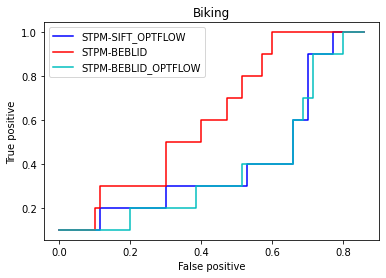

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
#x = np.arange(0, len(res), 1)
y1 = a #map_fet
y2 = b #mar_fet
y3 = a1 #map_fet_fft
y4 = b1 #mar_fet_fft
y5 = map_fet
y6 = mar_fet
y7 = map_fet1
y8 = mar_fet1
plt.plot(y2,y1, "-b", label="STPM-SIFT_OPTFLOW")
#plt.plot(y4,y3, "-g", label = "STPM-SIFT")
plt.plot(y6,y5, "-r", label = "STPM-BEBLID")
plt.plot(y8,y7, "-c", label = "STPM-BEBLID_OPTFLOW")
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title('Biking')
plt.legend()
plt.show()

In [ ]:
#CBVR SAMPLE TEST BENCH FOR STPM_BEBLID_HISTOGRAM_INTERSECTION + STPM_OPTFLOW_HISTOGRAM_HISTOGRAM BASED COMPARISONS
#Accessing the feature database
import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing

import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing

import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os
import cv2
import numpy as np
import json
import time
import math
import os
import shutil
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing


from glob import glob
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances
import torch
import torch.nn as nn
from torchvision import models
from PIL import Image
from torchvision import transforms
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

#model = models.alexnet(pretrained=True)
model = VGG16(weights= 'imagenet', include_top=False)


#40800
def histogram_intersection(h1, h2, l):
    sm = 0

    for i in range(l):
        sm += min(h1[i], h2[i])
    return sm


#CODE TO EXTRACT VGG16 FEATURES FROM QUERY IMAGE
hist = []
features_current_file_new1 = []
features_current_file_new = []
count_frame = 0
prev_frame = None
path = '/content/UCF50/data/Biking/Biking5.mp4'
video_id = 'query'
#cou = cou + 1
#video = filepath
video_capture = cv2.VideoCapture(path)
currentframe = 0
try: 
  if not os.path.exists(f'data/frames/{video_id}'): 
    os.makedirs(f'data/frames/{video_id}') 
except OSError: 
  print ('Error: Creating directory of data')
while(True): 
  ret, frame = video_capture.read() 
  if ret: 
    name = f'data/frames/{video_id}/' + str(currentframe) + '.jpg'
    print ('Creating...' + name) 
    cv2.imwrite(name, frame)
    name = f'data/frames/{video_id}/' + str(currentframe) + '.jpg'
    print ('Creating...' + name) 
    cv2.imwrite(name, frame)
    print(name) 
    #currentframe += 1 
    #input_image = Image.open(name)
    #CODE OF VGG features
    img = image.load_img(name, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0 )
    x = preprocess_input(x)

    feature = model.predict(x)
    print(feature)
        
    probabilities = feature.reshape(-1,1)
    #probabilities = output.probabilities(-1,1)
    #print(probabilities)
    kmeans = KMeans(n_clusters=150, init='k-means++', max_iter=300, n_init=10, random_state=0)
    predict = kmeans.fit_predict(probabilities)

    histo = np.bincount(predict, minlength=150).reshape(1,-1).ravel()
    print((histo))
    #plt.bar(x, histo, label="Occurrence of Visual Word")
    #plt.legend()

    # The following commands add labels to our figure.
    #plt.xlabel('Visual Word')
    #plt.ylabel('Frequency')
    #plt.title('Visual Bag of Words')

    #plt.show()
    
    histo = histo.tolist()
    hist.append(histo)
    features_current_file_new1.append(hist)

    currentframe += 1
  else: 
    break
video_capture.release() 
cv2.destroyAllWindows()
shutil.rmtree(f'data/frames')
#print(descriptor)



features_current_file = np.array(features_current_file_new1)
# No of frames
print((features_current_file.shape))
new_feat = []
for i in range(features_current_file.shape[0]):
  for j in range(features_current_file.shape[1]):
    for k in range(features_current_file.shape[2]):
      new_feat.append(features_current_file[i][j][k])

#new_feat = np.array(new_feat)
#new_feat
features_current_file_new2 = np.array(new_feat)


# List to store result
feature_result = []
feature_result1 = []


# open a file, where you stored the pickled data
file = open('/content/UCF50/data/data/deep_VGG16_UCF50.p', 'rb')


# dump information to that file
data = pickle.load(file)


# close the file
file.close()



print('Showing the pickled data:')


cnt = 0
for item in data:
    #print('The data ', cnt, ' is : ', item['path'])
    #print('The data ', cnt, ' is : ', len(item['features']))

    
    #point_a = np.array(item['feature1'])
    #point_a = point_a.ravel()

    #point_b = np.array(features_current_file)
    #point_b = point_b.ravel()

    #distance = np.linalg.norm(point_a - point_b)
    #distance = histogram_intersection(point_a, point_b, len(point_a))

    #point_c = np.array(item['feature2'])
    #point_c = point_c.ravel()

    #point_d = np.array(features_current_file_new)
    #point_d = point_d.ravel()

    #distance1 = np.linalg.norm(point_c - point_d)
    #distance1 = histogram_intersection(point_c, point_d, len(point_c))
    #print(distance1)

    point_e = np.array(item['features'])
    point_e = point_e.ravel()

    point_f = np.array(features_current_file_new2)
    point_f = point_f.ravel()

    #distance2 = np.linalg.norm(point_e - point_f)
    distance2 = histogram_intersection(point_e, point_f, len(point_e))
    print(distance2)



    alpha = 0.2

    #distance_final = (alpha * distance) + ((1-alpha)* distance1)
    #distance_final = (distance * 1/3) + (distance1 * 1/3) + (distance2 * 1/3)
    distance_final = distance2
    feature_result.append({
                
                "path" : item['path'],
                "similarity" : distance_final,
                "category" : item['category'] 
            })

    cnt += 1



print(feature_result)
df = DataFrame (feature_result)
print (df)





dff = df[df['similarity'] > 0].sort_values(by=['similarity'], ascending=False)
#print(df2)
#df1 = df[df['similarity'] < 0].sort_values(by=['similarity'], ascending=False)
#print(df1)
#dff  = df2.append(df1, ignore_index=True)
print(dff)


Creating...data/frames/query/0.jpg
Creating...data/frames/query/0.jpg
data/frames/query/0.jpg
[[[[ 3.5306034  0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   ...
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         3.8552246
     0.       ]
   [ 0.         0.         0.        ...  0.        11.945619
     0.       ]]

  [[ 3.3014677  0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   ...
   [ 0.         0.         0.        ...  0.         0.
    17.467926 ]
   [ 0.         0.         0.        ...  0.         0.
    29.873562 ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]]

  [[ 0.    

In [ ]:
#MEAN AVERAGE PRECISION
import matplotlib.pyplot as plt

TP = 0
FP = 0

Total = len(dff) 
print(Total)
res = []
query = 'Biking'
#for i in range(0,Total):
for index, row in dff.iterrows():
  #print(row['category'])
  res.append(row['category'])
print(res)
print(len(res))

map = []
for i in range(0,len(res)):
  if(res[i] == query):
    map.append(1)
  else:
    map.append(0)

print(map)  

map_fet2 = []
mar_fet2 = []
mTP = 0

mTR = 0
for i in range(0,len(map)):
  if map[i] == 1:
    TP = TP + 1
    
  #true positive rate
    mTP = TP / (10)
  map_fet2.append(mTP)  
  if map[i] == 0:
    FP = FP + 1
    #false positive rate
    mTR = FP / (70)
  mar_fet2.append(mTR)
    
  
print(map_fet2)
print(mar_fet2)
#np.savetxt('map_fet.txt', map_fet)
#np.savetxt('mar_fet.txt', mar_fet)



70
['Biking', 'Biking', 'Kayaking', 'Biking', 'TaiChi', 'JumpingJack', 'Biking', 'JumpingJack', 'Skijet', 'PlayingGuitar', 'JumpingJack', 'Kayaking', 'Kayaking', 'TaiChi', 'PlayingGuitar', 'JumpingJack', 'Rowing', 'Biking', 'Biking', 'Skijet', 'Skijet', 'Kayaking', 'Biking', 'Skijet', 'Skijet', 'PlayingGuitar', 'Kayaking', 'Kayaking', 'Skijet', 'TaiChi', 'JumpingJack', 'PlayingGuitar', 'Rowing', 'Skijet', 'Rowing', 'Skijet', 'TaiChi', 'Kayaking', 'Rowing', 'Rowing', 'Skijet', 'Rowing', 'Rowing', 'PlayingGuitar', 'Biking', 'JumpingJack', 'JumpingJack', 'PlayingGuitar', 'Biking', 'JumpingJack', 'Kayaking', 'PlayingGuitar', 'Rowing', 'TaiChi', 'Rowing', 'Skijet', 'PlayingGuitar', 'TaiChi', 'JumpingJack', 'TaiChi', 'Rowing', 'TaiChi', 'PlayingGuitar', 'JumpingJack', 'Biking', 'PlayingGuitar', 'Kayaking', 'TaiChi', 'TaiChi', 'Kayaking']
70
[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

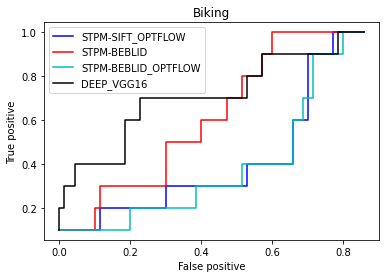

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
#x = np.arange(0, len(res), 1)
y1 = a #map_fet
y2 = b #mar_fet
y3 = a1 #map_fet_fft
y4 = b1 #mar_fet_fft
y5 = map_fet
y6 = mar_fet
y7 = map_fet1
y8 = mar_fet1
y9 = map_fet2
y10 = mar_fet2
plt.plot(y2,y1, "-b", label="STPM-SIFT_OPTFLOW")
#plt.plot(y4,y3, "-g", label = "STPM-SIFT")
plt.plot(y6,y5, "-r", label = "STPM-BEBLID")
plt.plot(y8,y7, "-c", label = "STPM-BEBLID_OPTFLOW")
plt.plot(y10,y9, "-k", label = "DEEP_VGG16")
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title('Biking')
plt.legend()
plt.show()

In [ ]:
#What if I try to find out STPM VGG16 features

In [ ]:
#CODE FOR EXTRACTING bag of features as features and storing as feature files all categories in one pickle file

import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os
import cv2
import numpy as np
import json
import time
import math
import os
import shutil
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing


from glob import glob
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances
import torch
import torch.nn as nn
from torchvision import models
from PIL import Image
from torchvision import transforms
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

#model = models.alexnet(pretrained=True)
model = VGG16(weights= 'imagenet', include_top=False)




# remove last fully-connected layer
#new_classifier = nn.Sequential(*list(model.classifier.children())[:-2])
#new_classifier = nn.Sequential(*list(model.features.children())[:-3])
#model.classifier = new_classifier

n_clusters = 150




CATEGORIES = ["Biking", "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]#, "handwaving"]#, "jogging", "running", 
   # "walking"]

if __name__ == "__main__":
    
    x = []
    for i in range(n_clusters):
      x.append(i+1)
    # Create directory to store extracted pixel features.
    os.makedirs("data", exist_ok=True)

    #dictionary for storing vocab of each video
    vocab_video = {}
    

    n_processed_files = 0
    features = []
    descriptor_list = {}
    
    for category in CATEGORIES:
        print("Processing category %s" % category)
        cou = 0
        # Get all files in current category's folder.
        folder_path = os.path.join("..", "data", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []
        
        for filename in filenames:
            descriptor = []
            #hist = []
            # Store features in current file.
            features_current_file_new1 = []

            hist = []
            filepath = os.path.join("..", "data", category, filename)
            path = "/content/UCF50/data/" + category + "/" + filename
            video_id = category
            cou = cou + 1
            video = filepath
            video_capture = cv2.VideoCapture(video)
            currentframe = 0
            try: 
              if not os.path.exists(f'data/frames/{video_id}'): 
                os.makedirs(f'data/frames/{video_id}') 
            except OSError: 
              print ('Error: Creating directory of data')
            while(True): 
              ret, frame = video_capture.read() 
              if ret: 
                name = f'data/frames/{video_id}/' + str(currentframe) + '.jpg'
                print ('Creating...' + name) 
                cv2.imwrite(name, frame)
                name = f'data/frames/{video_id}/' + str(currentframe) + '.jpg'
                print ('Creating...' + name) 
                cv2.imwrite(name, frame)
                print(name) 
                #currentframe += 1 
                #input_image = Image.open(name)
                #CODE OF VGG features
                img = image.load_img(name, target_size=(224, 224))
                x = image.img_to_array(img)
                x = np.expand_dims(x, axis=0 )
                x = preprocess_input(x)

                feature = model.predict(x)
                print(feature)
                    
                probabilities = feature.reshape(-1,1)
                #probabilities = output.probabilities(-1,1)
                #print(probabilities)
                kmeans = KMeans(n_clusters=150, init='k-means++', max_iter=300, n_init=10, random_state=0)
                predict = kmeans.fit_predict(probabilities)

                histo = np.bincount(predict, minlength=150).reshape(1,-1).ravel()
                print((histo))
                #plt.bar(x, histo, label="Occurrence of Visual Word")
                #plt.legend()

                # The following commands add labels to our figure.
                #plt.xlabel('Visual Word')
                #plt.ylabel('Frequency')
                #plt.title('Visual Bag of Words')

                #plt.show()
                
                histo = histo.tolist()
                hist.append(histo)
                features_current_file_new1.append(hist)

                currentframe += 1
              else: 
                break
            video_capture.release() 
            cv2.destroyAllWindows()
            shutil.rmtree(f'data/frames')
#print(descriptor)


    
            features_current_file = np.array(features_current_file_new1)
            # No of frames
            print((features_current_file.shape))
            new_feat = []
            for i in range(features_current_file.shape[0]):
              for j in range(features_current_file.shape[1]):
                for k in range(features_current_file.shape[2]):
                  new_feat.append(features_current_file[i][j][k])

            new_feat = np.array(new_feat)
            new_feat

              
            
            

            print(filename)    
            print(path)
            features.append({
                "filename": filename,
                "path" : path,
                "category": category,
                "features": new_feat 
            })

            

            n_processed_files += 1
            if n_processed_files % 30 == 0:
                print("Done %d files" % n_processed_files)

        # Dump data to file.
pickle.dump(features, open("data/deep_VGG16_UCF50.p" , "wb"))




In [ ]:
#CODE FOR EXTRACTING bag of features as features and storing as feature files all categories in one pickle file

import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os
import cv2
import numpy as np
import json
import time
import math
import os
import shutil
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing


from glob import glob
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances
import torch
import torch.nn as nn
from torchvision import models
from PIL import Image
from torchvision import transforms
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

#model = models.alexnet(pretrained=True)
model = VGG16(weights= 'imagenet', include_top=False)




# remove last fully-connected layer
#new_classifier = nn.Sequential(*list(model.classifier.children())[:-2])
#new_classifier = nn.Sequential(*list(model.features.children())[:-3])
#model.classifier = new_classifier

n_clusters = 150




CATEGORIES = ["Biking", "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]#, "handwaving"]#, "jogging", "running", 
   # "walking"]

if __name__ == "__main__":
    
    x = []
    for i in range(n_clusters):
      x.append(i+1)
    # Create directory to store extracted pixel features.
    os.makedirs("data", exist_ok=True)

    #dictionary for storing vocab of each video
    vocab_video = {}
    

    n_processed_files = 0
    features = []
    descriptor_list = {}
    
    for category in CATEGORIES:
        print("Processing category %s" % category)
        cou = 0
        # Get all files in current category's folder.
        folder_path = os.path.join("..", "data", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []
        
        for filename in filenames:
            descriptor = []
            #hist = []
            # Store features in current file.
            features_current_file_new1 = []
            video_deep = []
            hist = []
            filepath = os.path.join("..", "data", category, filename)
            path = "/content/UCF50/data/" + category + "/" + filename
            video_id = category
            cou = cou + 1
            video = filepath
            video_capture = cv2.VideoCapture(video)
            currentframe = 0
            try: 
              if not os.path.exists(f'data/frames/{video_id}'): 
                os.makedirs(f'data/frames/{video_id}') 
            except OSError: 
              print ('Error: Creating directory of data')
            while(True): 
              ret, frame = video_capture.read() 
              if ret: 
                name = f'data/frames/{video_id}/' + str(currentframe) + '.jpg'
                print ('Creating...' + name) 
                cv2.imwrite(name, frame)
                name = f'data/frames/{video_id}/' + str(currentframe) + '.jpg'
                print ('Creating...' + name) 
                cv2.imwrite(name, frame)
                print(name) 
                currentframe += 1 
                #input_image = Image.open(name)
                #CODE OF VGG features
                img = image.load_img(name, target_size=(224, 224))
                x = image.img_to_array(img)
                x = np.expand_dims(x, axis=0 )
                x = preprocess_input(x)

                feature = model.predict(x)
                print(feature)
                video_deep.append(feature.reshape(1, -1))
              else: 
                break
            video_capture.release() 
            cv2.destroyAllWindows()
            shutil.rmtree(f'data/frames')

                    
                #probabilities = feature.reshape(-1,1)
                #probabilities = output.probabilities(-1,1)
                #print(probabilities)
            kmeans = KMeans(n_clusters=150, init='k-means++', max_iter=300, n_init=10, random_state=0)
            predict = kmeans.fit_predict(video_deep[0].reshape(-1, 1))

            histo = np.bincount(predict, minlength=150).reshape(1,-1).ravel()
            #print((histo))
            #plt.bar(x, histo, label="Occurrence of Visual Word")
            #plt.legend()

            # The following commands add labels to our figure.
            #plt.xlabel('Visual Word')
            #plt.ylabel('Frequency')
            #plt.title('Visual Bag of Words')

            #plt.show()
            
            histo = histo.tolist()
            hist.append(histo)
            features_current_file_new1.append(hist[0])

                #currentframe += 1
              #print(descriptor)


    
            features_current_file = np.array(features_current_file_new1)
            # No of frames
            print(features_current_file[0])
              
            
            

            print(filename)    
            print(path)
            features.append({
                "filename": filename,
                "path" : path,
                "category": category,
                "features": features_current_file[0] 
            })

            

            n_processed_files += 1
            if n_processed_files % 30 == 0:
                print("Done %d files" % n_processed_files)

        # Dump data to file.
pickle.dump(features, open("data/deep_VGG16v2_UCF50.p" , "wb"))




Streaming output truncated to the last 5000 lines.

  [[ 0.         0.         0.        ...  0.         0.
     1.9096007]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   ...
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]]]]
[22353    18    30     3    19     1    42     7    16     1     1    42
    10     8    29     6     1    17    49    28     4     1     1    11
     1     6    53    34    33     2    19     5    25    44    24     5
    59    39    24    11     3     1    17     5    20     7     3    37
     5     3     4    47    13    47    21     9    38    17     2    38
     9     1     5    25    32     1    24    62     5     3    22    20
     3    48    45     2    18     1     7     3    18     3    54  

In [ ]:
file = open('/content/UCF50/data/data/deep_VGG16v2_UCF50.p', 'rb')


# dump information to that file
data = pickle.load(file)


# close the file
file.close()



print('Showing the pickled data:')


cnt = 1
for item in data:
    #print('The data ', cnt, ' is : ', item['path'])
    print('The data ', cnt, ' is : ', (item['features']))
    cnt = cnt + 1

Showing the pickled data:
The data  1  is :  [   17 22056     5     2    26    39     1     7     7    27    54    33
     6    12     1    48    22    11     4    37    14    33     9    66
     1     4     2    45    30     1     9    29    10     1    12     5
    66    42    22    22    43     9    53    27     6     1     4    10
     8     2     3     1    35    57    31    17    54    22    15     1
     8    22    28    21     4    34     2    36    27    26    10    28
     3    10    19    20    45    47    51    24    49    20     6     8
     4    21     3    62    44    30     1     2    34     2    35    34
    42    34    10     8    39     1     7     3    59     1    12    40
    12    47    22    12     3    35    50     4     3    40    13    14
     7     8    36    27     7    15    24     2    20    22    12    21
    15     8     8     2    42     1     7    31     1    42    28     3
    54     1    20     1    47     8]
The data  2  is :  [21387    14    34    

In [ ]:
#CBVR SAMPLE TEST BENCH FOR STPM_BEBLID_HISTOGRAM_INTERSECTION + STPM_OPTFLOW_HISTOGRAM_HISTOGRAM BASED COMPARISONS
#Accessing the feature database
import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing

import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing

import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os
import cv2
import numpy as np
import json
import time
import math
import os
import shutil
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing


from glob import glob
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances
import torch
import torch.nn as nn
from torchvision import models
from PIL import Image
from torchvision import transforms
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

#model = models.alexnet(pretrained=True)
model = VGG16(weights= 'imagenet', include_top=False)


#40800
def histogram_intersection(h1, h2, l):
    sm = 0

    for i in range(l):
        sm += min(h1[i], h2[i])
    return sm


#CODE TO EXTRACT VGG16 FEATURES FROM QUERY IMAGE
hist = []
features_current_file_new1 = []
features_current_file_new = []
video_deep = []
count_frame = 0
prev_frame = None
path = '/content/UCF50/data/Biking/Biking5.mp4'
video_id = 'query'
#cou = cou + 1
#video = filepath
video_capture = cv2.VideoCapture(path)
currentframe = 0
try: 
  if not os.path.exists(f'data/frames/{video_id}'): 
    os.makedirs(f'data/frames/{video_id}') 
except OSError: 
  print ('Error: Creating directory of data')
while(True): 
  ret, frame = video_capture.read() 
  if ret: 
    name = f'data/frames/{video_id}/' + str(currentframe) + '.jpg'
    print ('Creating...' + name) 
    cv2.imwrite(name, frame)
    name = f'data/frames/{video_id}/' + str(currentframe) + '.jpg'
    print ('Creating...' + name) 
    cv2.imwrite(name, frame)
    print(name) 
    currentframe += 1 
    #input_image = Image.open(name)
    #CODE OF VGG features
    img = image.load_img(name, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0 )
    x = preprocess_input(x)

    feature = model.predict(x)
    print(feature)
    video_deep.append(feature.reshape(1, -1))
  else: 
    break
video_capture.release() 
cv2.destroyAllWindows()
shutil.rmtree(f'data/frames')

        
    #probabilities = feature.reshape(-1,1)
    #probabilities = output.probabilities(-1,1)
    #print(probabilities)
kmeans = KMeans(n_clusters=150, init='k-means++', max_iter=300, n_init=10, random_state=0)
predict = kmeans.fit_predict(video_deep[0].reshape(-1, 1))

histo = np.bincount(predict, minlength=150).reshape(1,-1).ravel()
#print((histo))
#plt.bar(x, histo, label="Occurrence of Visual Word")
#plt.legend()

# The following commands add labels to our figure.
#plt.xlabel('Visual Word')
#plt.ylabel('Frequency')
#plt.title('Visual Bag of Words')

#plt.show()

histo = histo.tolist()
hist.append(histo)    

features_current_file_new1.append(hist[0])

    
features_current_file_new2 = np.array(features_current_file_new1[0])


# List to store result
feature_result = []
feature_result1 = []


# open a file, where you stored the pickled data
file = open('/content/UCF50/data/data/deep_VGG16v2_UCF50.p', 'rb')


# dump information to that file
data = pickle.load(file)


# close the file
file.close()



print('Showing the pickled data:')


cnt = 0
for item in data:
    #print('The data ', cnt, ' is : ', item['path'])
    #print('The data ', cnt, ' is : ', len(item['features']))

    
    #point_a = np.array(item['feature1'])
    #point_a = point_a.ravel()

    #point_b = np.array(features_current_file)
    #point_b = point_b.ravel()

    #distance = np.linalg.norm(point_a - point_b)
    #distance = histogram_intersection(point_a, point_b, len(point_a))

    #point_c = np.array(item['feature2'])
    #point_c = point_c.ravel()

    #point_d = np.array(features_current_file_new)
    #point_d = point_d.ravel()

    #distance1 = np.linalg.norm(point_c - point_d)
    #distance1 = histogram_intersection(point_c, point_d, len(point_c))
    #print(distance1)

    point_e = np.array(item['features'])
    point_e = point_e.ravel()

    point_f = np.array(features_current_file_new2)
    point_f = point_f.ravel()

    #distance2 = np.linalg.norm(point_e - point_f)
    distance2 = histogram_intersection(point_e, point_f, len(point_e))
    print(distance2)



    alpha = 0.2

    #distance_final = (alpha * distance) + ((1-alpha)* distance1)
    #distance_final = (distance * 1/3) + (distance1 * 1/3) + (distance2 * 1/3)
    distance_final = distance2
    feature_result.append({
                
                "path" : item['path'],
                "similarity" : distance_final,
                "category" : item['category'] 
            })

    cnt += 1



print(feature_result)
df = DataFrame (feature_result)
print (df)





dff = df[df['similarity'] > 0].sort_values(by=['similarity'], ascending=False)
#print(df2)
#df1 = df[df['similarity'] < 0].sort_values(by=['similarity'], ascending=False)
#print(df1)
#dff  = df2.append(df1, ignore_index=True)
print(dff)


Creating...data/frames/query/0.jpg
Creating...data/frames/query/0.jpg
data/frames/query/0.jpg
[[[[ 3.5306034  0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   ...
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         3.8552246
     0.       ]
   [ 0.         0.         0.        ...  0.        11.945619
     0.       ]]

  [[ 3.3014677  0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   ...
   [ 0.         0.         0.        ...  0.         0.
    17.467926 ]
   [ 0.         0.         0.        ...  0.         0.
    29.873562 ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]]

  [[ 0.    

In [ ]:
#MEAN AVERAGE PRECISION
import matplotlib.pyplot as plt

TP = 0
FP = 0

Total = len(dff) 
print(Total)
res = []
query = 'Biking'
#for i in range(0,Total):
for index, row in dff.iterrows():
  #print(row['category'])
  res.append(row['category'])
print(res)
print(len(res))

map = []
for i in range(0,len(res)):
  if(res[i] == query):
    map.append(1)
  else:
    map.append(0)

print(map)  

map_fet2 = []
mar_fet2 = []
mTP = 0

mTR = 0
for i in range(0,len(map)):
  if map[i] == 1:
    TP = TP + 1
    
  #true positive rate
    mTP = TP / (10)
  map_fet2.append(mTP)  
  if map[i] == 0:
    FP = FP + 1
    #false positive rate
    mTR = FP / (70)
  mar_fet2.append(mTR)
    
  
print(map_fet2)
print(mar_fet2)
#np.savetxt('map_fet.txt', map_fet)
#np.savetxt('mar_fet.txt', mar_fet)



70
['Biking', 'Biking', 'Biking', 'JumpingJack', 'PlayingGuitar', 'PlayingGuitar', 'TaiChi', 'Kayaking', 'JumpingJack', 'Biking', 'JumpingJack', 'PlayingGuitar', 'JumpingJack', 'Biking', 'Kayaking', 'Kayaking', 'JumpingJack', 'Biking', 'PlayingGuitar', 'Biking', 'Kayaking', 'Skijet', 'Biking', 'Skijet', 'JumpingJack', 'Skijet', 'JumpingJack', 'Kayaking', 'Rowing', 'Skijet', 'Rowing', 'JumpingJack', 'Kayaking', 'Kayaking', 'Kayaking', 'TaiChi', 'PlayingGuitar', 'Skijet', 'PlayingGuitar', 'Biking', 'TaiChi', 'JumpingJack', 'Rowing', 'Rowing', 'PlayingGuitar', 'Rowing', 'Skijet', 'Skijet', 'Skijet', 'TaiChi', 'Kayaking', 'TaiChi', 'Skijet', 'Rowing', 'Skijet', 'JumpingJack', 'PlayingGuitar', 'TaiChi', 'Rowing', 'Rowing', 'TaiChi', 'Rowing', 'TaiChi', 'TaiChi', 'Rowing', 'PlayingGuitar', 'Biking', 'PlayingGuitar', 'Kayaking', 'TaiChi']
70
[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

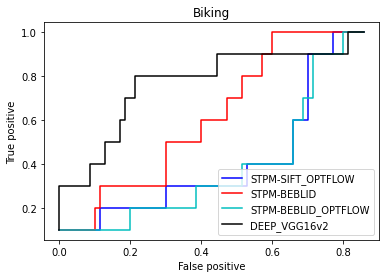

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
#x = np.arange(0, len(res), 1)
y1 = a #map_fet
y2 = b #mar_fet
y3 = a1 #map_fet_fft
y4 = b1 #mar_fet_fft
y5 = map_fet
y6 = mar_fet
y7 = map_fet1
y8 = mar_fet1
y9 = map_fet2
y10 = mar_fet2
plt.plot(y2,y1, "-b", label="STPM-SIFT_OPTFLOW")
#plt.plot(y4,y3, "-g", label = "STPM-SIFT")
plt.plot(y6,y5, "-r", label = "STPM-BEBLID")
plt.plot(y8,y7, "-c", label = "STPM-BEBLID_OPTFLOW")
plt.plot(y10,y9, "-k", label = "DEEP_VGG16v2")
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title('Biking')
plt.legend()
plt.show()

In [ ]:
#CBVR SAMPLE TEST BENCH FOR STPM_BEBLID_HISTOGRAM_INTERSECTION + STPM_OPTFLOW_HISTOGRAM_HISTOGRAM BASED COMPARISONS
#Accessing the feature database
import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing

import pickle
import cv2
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing

import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os
import cv2
import numpy as np
import json
import time
import math
import os
import shutil
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing


from glob import glob
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances
import torch
import torch.nn as nn
from torchvision import models
from PIL import Image
from torchvision import transforms
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

#model = models.alexnet(pretrained=True)
model = VGG16(weights= 'imagenet', include_top=False)


#40800
def histogram_intersection(h1, h2, l):
    sm = 0

    for i in range(l):
        sm += min(h1[i], h2[i])
    return sm


#CODE TO EXTRACT VGG16 FEATURES FROM QUERY IMAGE
hist = []
features_current_file_new1 = []
features_current_file_new = []
count_frame = 0
prev_frame = None
path = '/content/UCF50/data/Biking/Biking5.mp4'
video_id = 'query'
#cou = cou + 1
#video = filepath
video_capture = cv2.VideoCapture(path)
currentframe = 0
try: 
  if not os.path.exists(f'data/frames/{video_id}'): 
    os.makedirs(f'data/frames/{video_id}') 
except OSError: 
  print ('Error: Creating directory of data')
while(True): 
  ret, frame = video_capture.read() 
  if ret: 
    name = f'data/frames/{video_id}/' + str(currentframe) + '.jpg'
    print ('Creating...' + name) 
    cv2.imwrite(name, frame)
    name = f'data/frames/{video_id}/' + str(currentframe) + '.jpg'
    print ('Creating...' + name) 
    cv2.imwrite(name, frame)
    print(name) 
    #currentframe += 1 
    #input_image = Image.open(name)
    #CODE OF VGG features
    img = image.load_img(name, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0 )
    x = preprocess_input(x)

    feature = model.predict(x)
    print(feature)
        
    probabilities = feature.reshape(-1,1)
    #probabilities = output.probabilities(-1,1)
    #print(probabilities)
    kmeans = KMeans(n_clusters=150, init='k-means++', max_iter=300, n_init=10, random_state=0)
    predict = kmeans.fit_predict(probabilities)

    histo = np.bincount(predict, minlength=150).reshape(1,-1).ravel()
    print((histo))
    #plt.bar(x, histo, label="Occurrence of Visual Word")
    #plt.legend()

    # The following commands add labels to our figure.
    #plt.xlabel('Visual Word')
    #plt.ylabel('Frequency')
    #plt.title('Visual Bag of Words')

    #plt.show()
    
    histo = histo.tolist()
    hist.append(histo)
    features_current_file_new1.append(hist)

    currentframe += 1
  else: 
    break
video_capture.release() 
cv2.destroyAllWindows()
shutil.rmtree(f'data/frames')
#print(descriptor)



features_current_file = np.array(features_current_file_new1)
# No of frames
print((features_current_file.shape))
new_feat = []
for i in range(features_current_file.shape[0]):
  for j in range(features_current_file.shape[1]):
    for k in range(features_current_file.shape[2]):
      new_feat.append(features_current_file[i][j][k])

#new_feat = np.array(new_feat)
#new_feat
features_current_file_new2 = np.array(new_feat)


# List to store result
feature_result = []
feature_result1 = []


# open a file, where you stored the pickled data
file = open('/content/UCF50/data/data/deep_VGG16_UCF50.p', 'rb')


# dump information to that file
data = pickle.load(file)


# close the file
file.close()



print('Showing the pickled data:')


cnt = 0
for item in data:
    #print('The data ', cnt, ' is : ', item['path'])
    #print('The data ', cnt, ' is : ', len(item['features']))

    
    #point_a = np.array(item['feature1'])
    #point_a = point_a.ravel()

    #point_b = np.array(features_current_file)
    #point_b = point_b.ravel()

    #distance = np.linalg.norm(point_a - point_b)
    #distance = histogram_intersection(point_a, point_b, len(point_a))

    #point_c = np.array(item['feature2'])
    #point_c = point_c.ravel()

    #point_d = np.array(features_current_file_new)
    #point_d = point_d.ravel()

    #distance1 = np.linalg.norm(point_c - point_d)
    #distance1 = histogram_intersection(point_c, point_d, len(point_c))
    #print(distance1)

    point_e = np.array(item['features'])
    point_e = point_e.ravel()

    point_f = np.array(features_current_file_new2)
    point_f = point_f.ravel()

    #distance2 = np.linalg.norm(point_e - point_f)
    distance2 = histogram_intersection(point_e, point_f, len(point_e))
    print(distance2)



    alpha = 0.2

    #distance_final = (alpha * distance) + ((1-alpha)* distance1)
    #distance_final = (distance * 1/3) + (distance1 * 1/3) + (distance2 * 1/3)
    distance_final = distance2
    feature_result.append({
                
                "path" : item['path'],
                "similarity" : distance_final,
                "category" : item['category'] 
            })

    cnt += 1



print(feature_result)
df = DataFrame (feature_result)
print (df)





dff = df[df['similarity'] > 0].sort_values(by=['similarity'], ascending=False)
#print(df2)
#df1 = df[df['similarity'] < 0].sort_values(by=['similarity'], ascending=False)
#print(df1)
#dff  = df2.append(df1, ignore_index=True)
print(dff)


Creating...data/frames/query/0.jpg
Creating...data/frames/query/0.jpg
data/frames/query/0.jpg
[[[[ 3.5306034  0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   ...
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         3.8552246
     0.       ]
   [ 0.         0.         0.        ...  0.        11.945619
     0.       ]]

  [[ 3.3014677  0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   ...
   [ 0.         0.         0.        ...  0.         0.
    17.467926 ]
   [ 0.         0.         0.        ...  0.         0.
    29.873562 ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]]

  [[ 0.    

In [ ]:
#MEAN AVERAGE PRECISION
import matplotlib.pyplot as plt

TP = 0
FP = 0

Total = len(dff) 
print(Total)
res = []
query = 'Biking'
#for i in range(0,Total):
for index, row in dff.iterrows():
  #print(row['category'])
  res.append(row['category'])
print(res)
print(len(res))

map = []
for i in range(0,len(res)):
  if(res[i] == query):
    map.append(1)
  else:
    map.append(0)

print(map)  

map_fet3 = []
mar_fet3 = []
mTP = 0

mTR = 0
for i in range(0,len(map)):
  if map[i] == 1:
    TP = TP + 1
    
  #true positive rate
    mTP = TP / (10)
  map_fet3.append(mTP)  
  if map[i] == 0:
    FP = FP + 1
    #false positive rate
    mTR = FP / (70)
  mar_fet3.append(mTR)
    
  
print(map_fet3)
print(mar_fet3)
#np.savetxt('map_fet.txt', map_fet)
#np.savetxt('mar_fet.txt', mar_fet)



70
['Biking', 'Biking', 'Kayaking', 'Biking', 'TaiChi', 'JumpingJack', 'Biking', 'JumpingJack', 'Skijet', 'PlayingGuitar', 'JumpingJack', 'Kayaking', 'Kayaking', 'TaiChi', 'PlayingGuitar', 'JumpingJack', 'Rowing', 'Biking', 'Biking', 'Skijet', 'Skijet', 'Kayaking', 'Biking', 'Skijet', 'Skijet', 'PlayingGuitar', 'Kayaking', 'Kayaking', 'Skijet', 'TaiChi', 'JumpingJack', 'PlayingGuitar', 'Rowing', 'Skijet', 'Rowing', 'Skijet', 'TaiChi', 'Kayaking', 'Rowing', 'Rowing', 'Skijet', 'Rowing', 'Rowing', 'PlayingGuitar', 'Biking', 'JumpingJack', 'JumpingJack', 'PlayingGuitar', 'Biking', 'JumpingJack', 'Kayaking', 'PlayingGuitar', 'Rowing', 'TaiChi', 'Rowing', 'Skijet', 'PlayingGuitar', 'TaiChi', 'JumpingJack', 'TaiChi', 'Rowing', 'TaiChi', 'PlayingGuitar', 'JumpingJack', 'Biking', 'PlayingGuitar', 'Kayaking', 'TaiChi', 'TaiChi', 'Kayaking']
70
[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

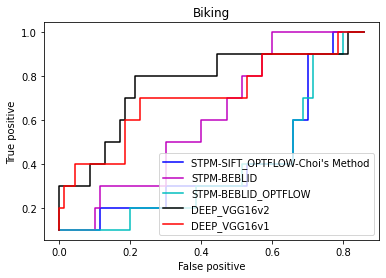

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
#x = np.arange(0, len(res), 1)
y1 = a #map_fet
y2 = b #mar_fet
y3 = a1 #map_fet_fft
y4 = b1 #mar_fet_fft
y5 = map_fet
y6 = mar_fet
y7 = map_fet1
y8 = mar_fet1
y9 = map_fet2
y10 = mar_fet2
y11 = map_fet3
y12 = mar_fet3

plt.plot(y2,y1, "-b", label="STPM-SIFT_OPTFLOW-Choi's Method")
#plt.plot(y4,y3, "-g", label = "STPM-SIFT")
plt.plot(y6,y5, "-m", label = "STPM-BEBLID")
plt.plot(y8,y7, "-c", label = "STPM-BEBLID_OPTFLOW")
plt.plot(y10,y9, "-k", label = "DEEP_VGG16v2")
plt.plot(y12,y11, "-r", label = "DEEP_VGG16v1")
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title('Biking')
plt.legend()
plt.show()

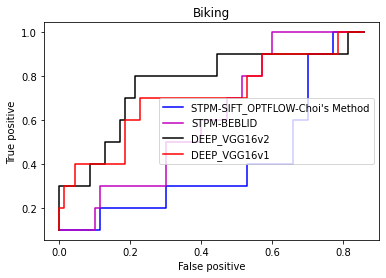

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
#x = np.arange(0, len(res), 1)
y1 = a #map_fet
y2 = b #mar_fet
y3 = a1 #map_fet_fft
y4 = b1 #mar_fet_fft
y5 = map_fet
y6 = mar_fet
y7 = map_fet1
y8 = mar_fet1
y9 = map_fet2
y10 = mar_fet2
y11 = map_fet3
y12 = mar_fet3

plt.plot(y2,y1, "-b", label="STPM-SIFT_OPTFLOW-Choi's Method")
#plt.plot(y4,y3, "-g", label = "STPM-SIFT")
plt.plot(y6,y5, "-m", label = "STPM-BEBLID")
#plt.plot(y8,y7, "-c", label = "STPM-BEBLID_OPTFLOW")
plt.plot(y10,y9, "-k", label = "DEEP_VGG16v2")
plt.plot(y12,y11, "-r", label = "DEEP_VGG16v1")
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title('Biking')
plt.legend()
plt.show()

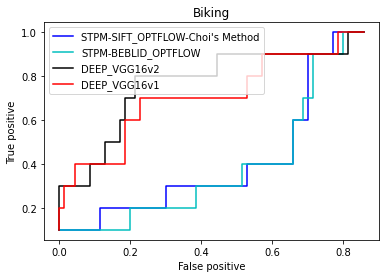

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
#x = np.arange(0, len(res), 1)
y1 = a #map_fet
y2 = b #mar_fet
y3 = a1 #map_fet_fft
y4 = b1 #mar_fet_fft
y5 = map_fet
y6 = mar_fet
y7 = map_fet1
y8 = mar_fet1
y9 = map_fet2
y10 = mar_fet2
y11 = map_fet3
y12 = mar_fet3

plt.plot(y2,y1, "-b", label="STPM-SIFT_OPTFLOW-Choi's Method")
#plt.plot(y4,y3, "-g", label = "STPM-SIFT")
#plt.plot(y6,y5, "-m", label = "STPM-BEBLID")
plt.plot(y8,y7, "-c", label = "STPM-BEBLID_OPTFLOW")
plt.plot(y10,y9, "-k", label = "DEEP_VGG16v2")
plt.plot(y12,y11, "-r", label = "DEEP_VGG16v1")
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title('Biking')
plt.legend()
plt.show()

In [ ]:
#MEAN AVERAGE PRECISION
import matplotlib.pyplot as plt

TP = 0
FP = 0

Total = len(dff) 
print(Total)
res = []
query = 'Biking'
#for i in range(0,Total):
for index, row in dff.iterrows():
  #print(row['category'])
  res.append(row['category'])
print(res)
print(len(res))

map = []
for i in range(0,len(res)):
  if(res[i] == query):
    map.append(1)
  else:
    map.append(0)

print(map)  

map_fet_fft7 = []
mar_fet_fft7 = []
mTP = 0

mTR = 0
for i in range(0,len(map)):
  if map[i] == 1:
    TP = TP + 1
    
  #true positive rate
    mTP = TP / (10)
  map_fet_fft7.append(mTP)  
  if map[i] == 0:
    FP = FP + 1
    #false positive rate
    mTR = FP / (70)
  mar_fet_fft7.append(mTR)
    
  
print(map_fet_fft7)
print(mar_fet_fft7)



70
['Biking', 'Biking', 'Kayaking', 'Biking', 'TaiChi', 'JumpingJack', 'Biking', 'JumpingJack', 'Skijet', 'PlayingGuitar', 'JumpingJack', 'Kayaking', 'Kayaking', 'TaiChi', 'PlayingGuitar', 'JumpingJack', 'Rowing', 'Biking', 'Biking', 'Skijet', 'Skijet', 'Kayaking', 'Biking', 'Skijet', 'Skijet', 'PlayingGuitar', 'Kayaking', 'Kayaking', 'Skijet', 'TaiChi', 'JumpingJack', 'PlayingGuitar', 'Rowing', 'Skijet', 'Rowing', 'Skijet', 'TaiChi', 'Kayaking', 'Rowing', 'Rowing', 'Skijet', 'Rowing', 'Rowing', 'PlayingGuitar', 'Biking', 'JumpingJack', 'JumpingJack', 'PlayingGuitar', 'Biking', 'JumpingJack', 'Kayaking', 'PlayingGuitar', 'Rowing', 'TaiChi', 'Rowing', 'Skijet', 'PlayingGuitar', 'TaiChi', 'JumpingJack', 'TaiChi', 'Rowing', 'TaiChi', 'PlayingGuitar', 'JumpingJack', 'Biking', 'PlayingGuitar', 'Kayaking', 'TaiChi', 'TaiChi', 'Kayaking']
70
[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
#CODE FOR EXTRACTING VIDEO FRAMES
import cv2
import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os
import cv2
import numpy as np
import json
import time
import math
import os
import shutil
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing


from glob import glob
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances
import torch
import torch.nn as nn
from torchvision import models
from PIL import Image
from torchvision import transforms
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

#model = models.alexnet(pretrained=True)
model = VGG16(weights= 'imagenet', include_top=False)

hist = []
video_deep = []
# Opens the Video file
cap= cv2.VideoCapture('/content/Biking1.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('kang'+str(i)+'.jpg',frame)

    img = image.load_img('kang'+str(i)+'.jpg', target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0 )
    x = preprocess_input(x)

    feature = model.predict(x)
    #print(feature)
    video_deep.append(feature.reshape(1, -1))
    #video_deep = np.array(video_deep)


    i+=1

cap.release()
cv2.destroyAllWindows()
video_deep = (np.array(video_deep)).reshape(1, -1)
print(video_deep)

kmeans = KMeans(n_clusters=150, init='k-means++', max_iter=300, n_init=10, random_state=0)
predict = kmeans.fit_predict(video_deep[0].reshape(-1, 1))

histo = np.bincount(predict, minlength=150).reshape(1,-1).ravel()
print((histo))
#plt.bar(x, histo, label="Occurrence of Visual Word")
#plt.legend()

# The following commands add labels to our figure.
#plt.xlabel('Visual Word')
#plt.ylabel('Frequency')
#plt.title('Visual Bag of Words')

#plt.show()

histo = histo.tolist()
hist.append(histo)
print(hist[0])
!rm *.jpg

[[0. 0. 0. ... 0. 0. 0.]]
[111246     55     25    149      3    228     87     47      8      2
    183     79    245     55    114      1    218      8     18     28
    290    157     52      3    100     68     76      1     50    189
     16    187     21      1     89    148    128    200      4    321
     11      6    169     29     16     58    172     57    248      7
    203     47     44     87    277     17    308     77      5    222
    155    174      1     18    229      6      2    169      4      2
     91    119     31    164    111     17      8     77      8      3
     44    221     25     75    137    246     61     46    239     59
     44    157      2     18     97    149     81     19    122    217
    167    183    124     52     28    226     22     27     24     43
      1    333     46    229    159    222    187      1     78     98
      4    284     26     64      3    161    246    148     53     10
     10    130     15    101     80     53      2  

In [ ]:
#CODE FOR EXTRACTING VIDEO FRAMES
import cv2
import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os
import cv2
import numpy as np
import json
import time
import math
import os
import shutil
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing


from glob import glob
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances
import torch
import torch.nn as nn
from torchvision import models
from PIL import Image
from torchvision import transforms
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

#model = models.alexnet(pretrained=True)
model = VGG16(weights= 'imagenet', include_top=False)

hist1 = []
video_deep = []
# Opens the Video file
cap= cv2.VideoCapture('/content/JumpingJack2.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('kang'+str(i)+'.jpg',frame)

    img = image.load_img('kang'+str(i)+'.jpg', target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0 )
    x = preprocess_input(x)

    feature = model.predict(x)
    #print(feature)
    video_deep.append(feature.reshape(1, -1))
    #video_deep = np.array(video_deep)


    i+=1

cap.release()
cv2.destroyAllWindows()
video_deep = (np.array(video_deep)).reshape(1, -1)
print(video_deep)

kmeans = KMeans(n_clusters=150, init='k-means++', max_iter=300, n_init=10, random_state=0)
predict = kmeans.fit_predict(video_deep[0].reshape(-1, 1))

histo = np.bincount(predict, minlength=150).reshape(1,-1).ravel()
print((histo))
#plt.bar(x, histo, label="Occurrence of Visual Word")
#plt.legend()

# The following commands add labels to our figure.
#plt.xlabel('Visual Word')
#plt.ylabel('Frequency')
#plt.title('Visual Bag of Words')

#plt.show()

histo = histo.tolist()
hist1.append(histo)
print(hist1)
!rm *.jpg

[[0.        0.        0.        ... 0.        3.8007605 0.       ]]
[110642     87     24    143      5    195     56    158    237      2
     15     35    101    179      1     58    156    313     58      5
     20     19    186    109     87    168    301     32    139     53
     58     45      1      1     26    273     11    222    164    227
    226      5    144     25     38     27    195    118     65      4
      6    257     51      1    107     52      5     26      4    294
    133    112     45     83     22     79    139     14     62     19
    140    201      7    175     17    202    246      3    260     27
     54    224    107     25    138    152    188     39    261      4
    269     11     25     23     11    109    231    205     89     20
     26    270     42    106    159    143      6    205    153    216
     51     62     72    247    165    139    158     33     43    126
    205     89     17     46    165     52      9     28      1     39
    267  

In [ ]:
def histogram_intersection(h1, h2, l):
    sm = 0

    for i in range(l):
        sm += min(h1[i], h2[i])
    return sm

print(histogram_intersection(hist[0], hist1[0], len(hist[0])))



118354


In [ ]:
#CODE FOR EXTRACTING VIDEO FRAMES
import cv2
import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os
import cv2
import numpy as np
import json
import time
import math
import os
import shutil
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing


from glob import glob
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances
import torch
import torch.nn as nn
from torchvision import models
from PIL import Image
from torchvision import transforms
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

#model = models.alexnet(pretrained=True)
model = VGG16(weights= 'imagenet', include_top=False)

video_deep = []
# Opens the Video file
cap= cv2.VideoCapture('/content/Biking1.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('kang'+str(i)+'.jpg',frame)

    img = image.load_img('kang'+str(i)+'.jpg', target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0 )
    x = preprocess_input(x)

    feature = model.predict(x)
    #print(feature)
    video_deep.append(feature.reshape(1, -1))
    #video_deep = np.array(video_deep)


    i+=1

cap.release()
cv2.destroyAllWindows()
video_deep = (np.array(video_deep)).reshape(1, -1)
print(video_deep)
!rm *.jpg

[[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#video_deep[0].shape
video_deep[0].reshape(1 ,-1).shape
#video_deep[4].reshape(1,-1).shape
video_deep.shape

(1, 125440)

In [ ]:
#CODE FOR EXTRACTING VIDEO FRAMES
import cv2
import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os
import cv2
import numpy as np
import json
import time
import math
import os
import shutil
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing


from glob import glob
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances
import torch
import torch.nn as nn
from torchvision import models
from PIL import Image
from torchvision import transforms
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

#model = models.alexnet(pretrained=True)
model = VGG16(weights= 'imagenet', include_top=False)

video_deep1 = []
# Opens the Video file
cap= cv2.VideoCapture('/content/Biking2.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('kang'+str(i)+'.jpg',frame)

    img = image.load_img('kang'+str(i)+'.jpg', target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0 )
    x = preprocess_input(x)

    feature = model.predict(x)
    #print(feature)
    video_deep1.append(feature.reshape(1, -1))
    #video_deep = np.array(video_deep)


    i+=1

cap.release()
cv2.destroyAllWindows()
video_deep1 = (np.array(video_deep1)).reshape(1, -1)
print(video_deep1)
!rm *.jpg

[[6.243306 0.       0.       ... 0.       0.       0.      ]]


In [ ]:
len(video_deep[0].reshape(-1, 1))

25088

In [ ]:
def histogram_intersection(h1, h2, l):
    sm = 0

    for i in range(l):
        sm += min(h1[i], h2[i])
    return sm

In [ ]:
print(histogram_intersection(video_deep[0], video_deep1[0], len(video_deep[0])))


29030.941942047328


In [ ]:
print(histogram_intersection(video_deep[0].reshape(-1, 1), video_deep1[0].reshape(-1, 1), len(video_deep[0].reshape(-1, 1)))[0])
print(histogram_intersection(video_deep[1].reshape(-1, 1), video_deep1[0].reshape(-1, 1), len(video_deep[1].reshape(-1, 1)))[0])
print(histogram_intersection(video_deep[2].reshape(-1, 1), video_deep1[2].reshape(-1, 1), len(video_deep[1].reshape(-1, 1)))[0])

5752.1943
7046.5386
6104.6323


In [ ]:
#for installing rar file
!pip install pyunpack
!pip install patool

     |████████████████████████████████| 77 kB 3.6 MB/s 


In [ ]:
%cd /content/UCF50/data

/content/UCF50/data


In [ ]:
from pyunpack import Archive
Archive('Biking.rar').extractall('/content/UCF50/data')
Archive('JumpingJack.rar').extractall('/content/UCF50/data')
Archive('Kayaking.rar').extractall('/content/UCF50/data')
Archive('PlayingGuitar.rar').extractall('/content/UCF50/data')
Archive('Rowing.rar').extractall('/content/UCF50/data')
Archive('Skijet.rar').extractall('/content/UCF50/data')
Archive('TaiChi.rar').extractall('/content/UCF50/data')

!rm *.rar